In [586]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [587]:
folder_name = '1645703267'
file_nr = '1'
stimuli_lenght_ms = 18000

In [588]:
df = pd.read_csv(f'rawdata/{folder_name}/pulseTS{file_nr}.csv', header=None, names=["value", "ts"])


In [589]:
original_count = len(df['value'])

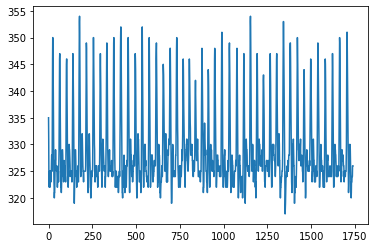

In [590]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [591]:
# remove small values
df = df.drop(df[df.value < 330].index)

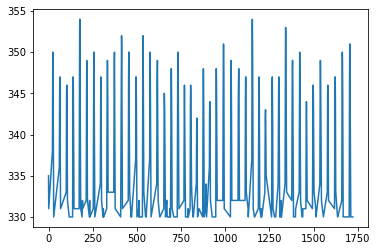

In [592]:
plt.plot(df.index, df['value'])

In [593]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

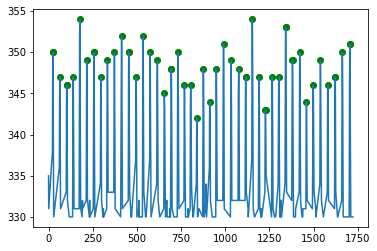

In [594]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [598]:
df = df.dropna()
df = df.reset_index(drop=True)

### Create second Dataframe

Which is exact copy of a first one, with one extra column on top - we will need it to calculate differences in time between peaks

In [600]:
data = []
data.insert(0,{'max': 0, 'ts': 0, 'value': 0})
df1 = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df1.head()

,max,ts,value
0,0.0,0,0.0
1,350.0,240,350.0
2,350.0,250,350.0
3,347.0,640,347.0
4,346.0,1030,346.0


## Change second Dataframe size

Currently it's one row longer than first one

In [601]:
df1 = df1[:-1]


In [605]:
# calculating the diff
df = df.assign(diff = df['ts'] - df1['ts'])
df

,value,ts,max,diff
0,350.0,240,350.0,240
1,350.0,250,350.0,10
2,347.0,640,347.0,390
3,346.0,1030,346.0,390
4,346.0,1040,346.0,10
5,347.0,1390,347.0,350
6,354.0,1770,354.0,380
7,349.0,2160,349.0,390
8,350.0,2560,350.0,400
9,350.0,2570,350.0,10
